<a href="https://colab.research.google.com/github/emmmum/Deep-Learning-hw/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # Added for better visualizations

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.18.0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 7.6563 - mae: 2.0717 - val_loss: 5.8430 - val_mae: 1.7884
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 5.9140 - mae: 1.6936 - val_loss: 3.8526 - val_mae: 1.4239
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3.4288 - mae: 1.3170 - val_loss: 2.5345 - val_mae: 1.1214
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3466 - mae: 1.0479 - val_loss: 1.7216 - val_mae: 0.8866
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5560 - mae: 0.8408 - val_loss: 1.2303 - val_mae: 0.7267
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3009 - mae: 0.7009 - val_loss: 0.9583 - val_mae: 0.6371
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9653 - mae: 0.6134 - val_loss: 0.8157 - val_mae: 0.5972
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8832 - mae: 0.5855 - val_loss: 0.7390 - val_mae: 0.5811
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3m

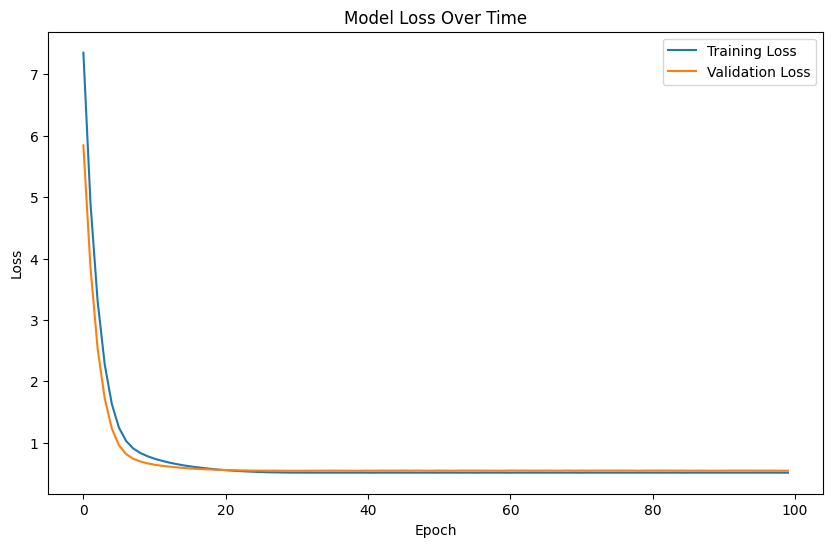

In [2]:
# Modern implementation of Linear Regression with TensorFlow
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and compile the model
model = Sequential([
    Dense(1, input_shape=(8,))
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


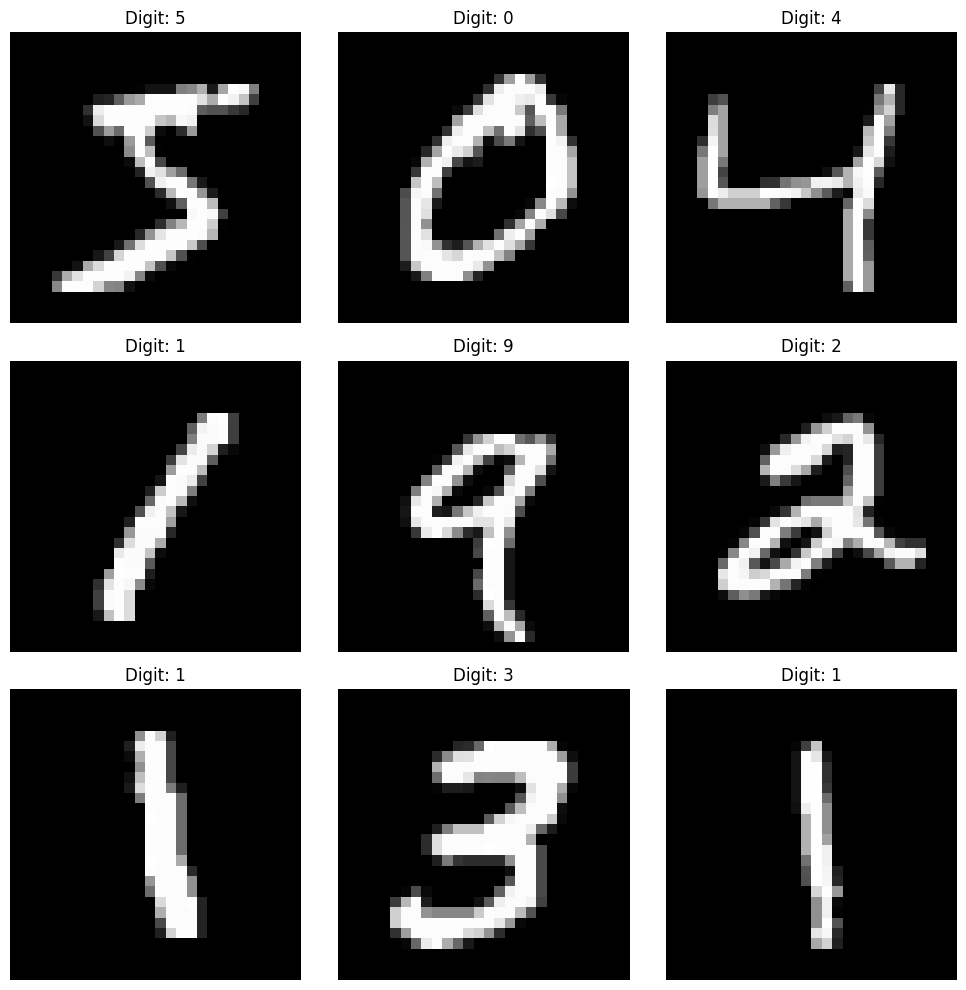

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.8281 - loss: 0.5500 - val_accuracy: 0.9662 - val_loss: 0.1074
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9608 - loss: 0.1313 - val_accuracy: 0.9744 - val_loss: 0.0809
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9718 - loss: 0.0934 - val_accuracy: 0.9782 - val_loss: 0.0728
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9791 - loss: 0.0684 - val_accuracy: 0.9798 - val_loss: 0.0676
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9819 - loss: 0.0584 - val_accuracy: 0.9804 - val_loss: 0.0701
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9854 - loss: 0.0490 - val_accuracy: 0.9812 - val_loss: 0.0677
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9862 - loss: 0.0439 - val_accuracy: 0.9821 - val_loss: 0.0673
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9883 - loss: 0.0361 - val_

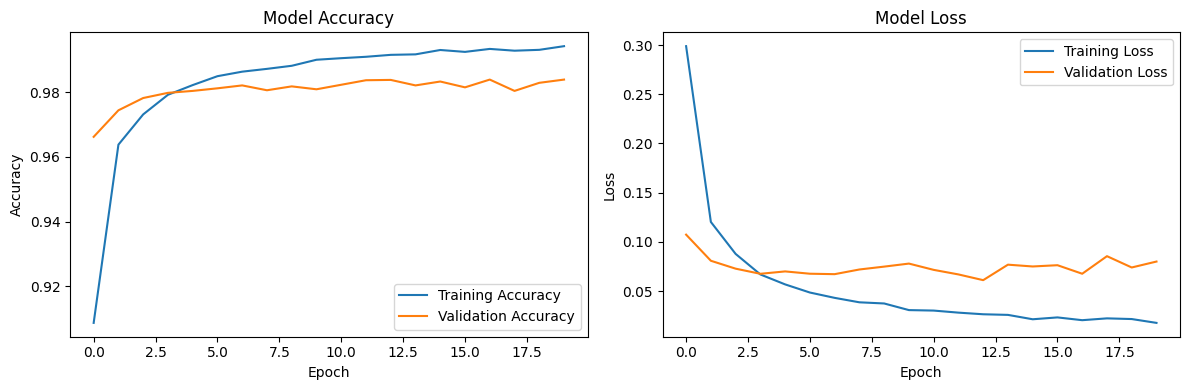

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Digit: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Preprocess the data
# Reshape and normalize
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create improved model with dropout for better regularization
def create_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create and train model
model = create_model()
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=1
)

# Evaluate model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {scores[1]*100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

4. Derive the gradients for the below expressions:

1) First, let's write out f(x) in expanded form:
   ```
   f(x) = 0.5 * x^T A x
   ```
   where x = [x₁; x₂] and A = [a₁,a₂; a₃,a₄]

2) Let's expand x^T A x:
   ```
   x^T = [x₁, x₂]
   A x = [a₁x₁ + a₂x₂; a₃x₁ + a₄x₂]
   ```
   Therefore:
   ```
   f(x) = 0.5 * [x₁, x₂][a₁x₁ + a₂x₂; a₃x₁ + a₄x₂]
   f(x) = 0.5 * (x₁(a₁x₁ + a₂x₂) + x₂(a₃x₁ + a₄x₂))
   f(x) = 0.5 * (a₁x₁² + a₂x₁x₂ + a₃x₁x₂ + a₄x₂²)
   ```

3) Since A is symmetric, we know that a₃ = a₂. Therefore:
   ```
   f(x) = 0.5 * (a₁x₁² + 2a₂x₁x₂ + a₄x₂²)
   ```

4) To find ∇f(x), we need to find partial derivatives with respect to x₁ and x₂:

   ∂f/∂x₁ = 0.5 * (2a₁x₁ + 2a₂x₂) = a₁x₁ + a₂x₂

   ∂f/∂x₂ = 0.5 * (2a₂x₁ + 2a₄x₂) = a₂x₁ + a₄x₂

5) Therefore:
   ```
   ∇f(x) = [∂f/∂x₁; ∂f/∂x₂]
         = [a₁x₁ + a₂x₂; a₂x₁ + a₄x₂]
         = [a₁,a₂; a₂,a₄][x₁; x₂]
         = A x
   ```

This proves that ∇f(x) = Ax for the quadratic function f(x) = 0.5 * x^T A x when A is symmetric.

The key steps in this proof were:
1. Expanding the matrix multiplication
2. Using the symmetry property of A (a₃ = a₂)
3. Taking partial derivatives
4. Recognizing that the resulting vector is equivalent to Ax

This result is particularly important in optimization theory as it shows that the gradient of a quadratic form with a symmetric matrix is linear in x.